# Analysis Pipeline

### Stages of Analysis Pipeline

    Variable Identification
        Identify if the variables are categorical or numerical and change the type of them
    
    Univariate Analysis
        numerical variables
            distplots
        categorical values
            histplots
    
    Bi-variate Analysis
        correlation
            pairplot
            heatmap
        numerical x numerical
            scatterplot
        categorical x numerical
            boxplots
                with outliers
                without outliers
        categorical x categorical
            relplots
            
     Time Series analysis
         lineplot
       

In [7]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
plt.rcParams['figure.figsize'] = (15,10)
#from scipy.signal import find_peaks
import matplotlib.dates as mdates
import sklearn as sk

### Variable Identification

In [14]:
df0 = pd.read_csv('df_pricing.csv')
df0.drop(columns=df0.columns[0], 
        axis=1, 
        inplace=True)
df0

,ORDER_DATE,PRODUCT,ID_REGION,PRODUCT_PRICE,PRODUCT_QUANTITY,WEEKDAY,IS_SCHOOL_BREAK,IS_HOLIDAY,IS_PAYMENTDAY
0,2019-11-05 19:00:00,P1,0,84.9,1.0,1,0,0,1
1,2019-11-08 14:00:00,P1,1,84.9,1.0,4,0,0,1
2,2019-11-09 08:00:00,P1,2,84.9,1.0,5,0,1,1
3,2019-11-09 09:00:00,P1,0,84.9,1.0,5,0,1,1
4,2019-11-09 16:00:00,P1,0,84.9,1.0,5,0,1,1
...,...,...,...,...,...,...,...,...,...
969820,2022-04-30 22:00:00,P1,323,116.5,1.0,5,0,1,1
969821,2022-04-30 22:00:00,P1,324,116.5,1.0,5,0,1,1
969822,2022-04-30 22:00:00,P1,449,114.0,1.0,5,0,1,1
969823,2022-04-30 23:00:00,P1,179,118.0,1.0,5,0,1,1


In [15]:
#df is the dataset changing the data type to the correct type
df = df0.astype({'PRODUCT':'category','ID_REGION':'category','IS_SCHOOL_BREAK':'category','IS_HOLIDAY':'category','IS_PAYMENTDAY':'category','WEEKDAY':'category'})
df['PRODUCT_PRICE'] = np.round(df['PRODUCT_PRICE'],2)
df['PRODUCT_QUANTITY'] = np.round(df['PRODUCT_QUANTITY'])
df = df.astype({'PRODUCT_QUANTITY':'int'})
#df = df.astype({'PRODUCT_QUANTITY':'','',''})
df['ORDER_DATE'] = pd.to_datetime(df0['ORDER_DATE'])
df['year'] =  (pd.DatetimeIndex(df['ORDER_DATE']).year)
df['month'] = (pd.DatetimeIndex(df['ORDER_DATE']).month)
df['day'] = (pd.DatetimeIndex(df['ORDER_DATE']).day)
df = df.astype({'year':'category','month':'category','day':'category'})
df = df.sort_values(by = ['ORDER_DATE'], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969825 entries, 0 to 969824
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ORDER_DATE        969825 non-null  datetime64[ns]
 1   PRODUCT           969825 non-null  category      
 2   ID_REGION         969825 non-null  category      
 3   PRODUCT_PRICE     969825 non-null  float64       
 4   PRODUCT_QUANTITY  969825 non-null  int32         
 5   WEEKDAY           969825 non-null  category      
 6   IS_SCHOOL_BREAK   969825 non-null  category      
 7   IS_HOLIDAY        969825 non-null  category      
 8   IS_PAYMENTDAY     969825 non-null  category      
 9   year              969825 non-null  category      
 10  month             969825 non-null  category      
 11  day               969825 non-null  category      
dtypes: category(9), datetime64[ns](1), float64(1), int32(1)
memory usage: 35.2 MB


## Univariate Analysis

In [16]:
cat_var = ['PRODUCT','ID_REGION','WEEKDAY','IS_HOLIDAY','IS_SCHOOL_BREAK','IS_PAYMENTDAY']
num_var = ['PRODUCT_PRICE','PRODUCT_QUANTITY']

#### Categorical Variables

In [17]:
df['ID_REGION'] = df['ID_REGION'].cat.as_ordered()
df['WEEKDAY'] = df['WEEKDAY'].cat.as_ordered()
df['IS_SCHOOL_BREAK'] = df['IS_SCHOOL_BREAK'].cat.as_ordered()
df['IS_HOLIDAY'] = df['IS_HOLIDAY'].cat.as_ordered()
df['IS_PAYMENTDAY'] = df['IS_PAYMENTDAY'].cat.as_ordered()

In [18]:
cat_shape = (2,3)
cat_var = np.array(cat_var).reshape(cat_shape)

In [19]:
cat_var

array([['PRODUCT', 'ID_REGION', 'WEEKDAY'],
       ['IS_HOLIDAY', 'IS_SCHOOL_BREAK', 'IS_PAYMENTDAY']], dtype='<U15')

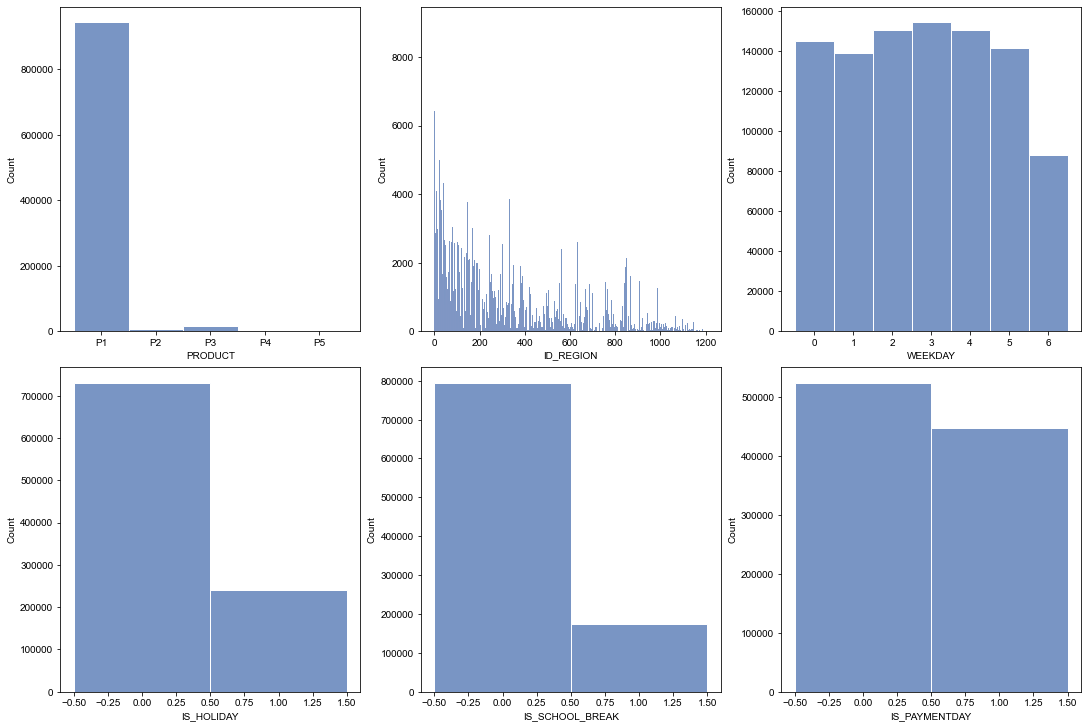

In [20]:
fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.histplot(df[cat_var[i,j]], ax = ax[i,j])

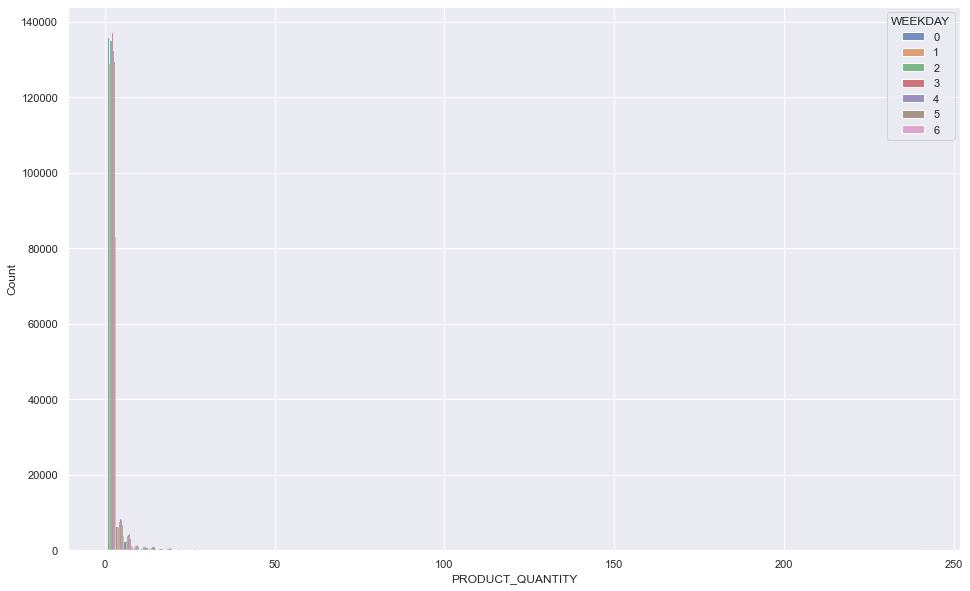

In [21]:
sns.histplot(df, x = df['PRODUCT_QUANTITY'], bins = 100, hue= df['WEEKDAY'], kde = False,  multiple="dodge")
plt.show()

#### Numerical Variables

(0.0, 50.0)

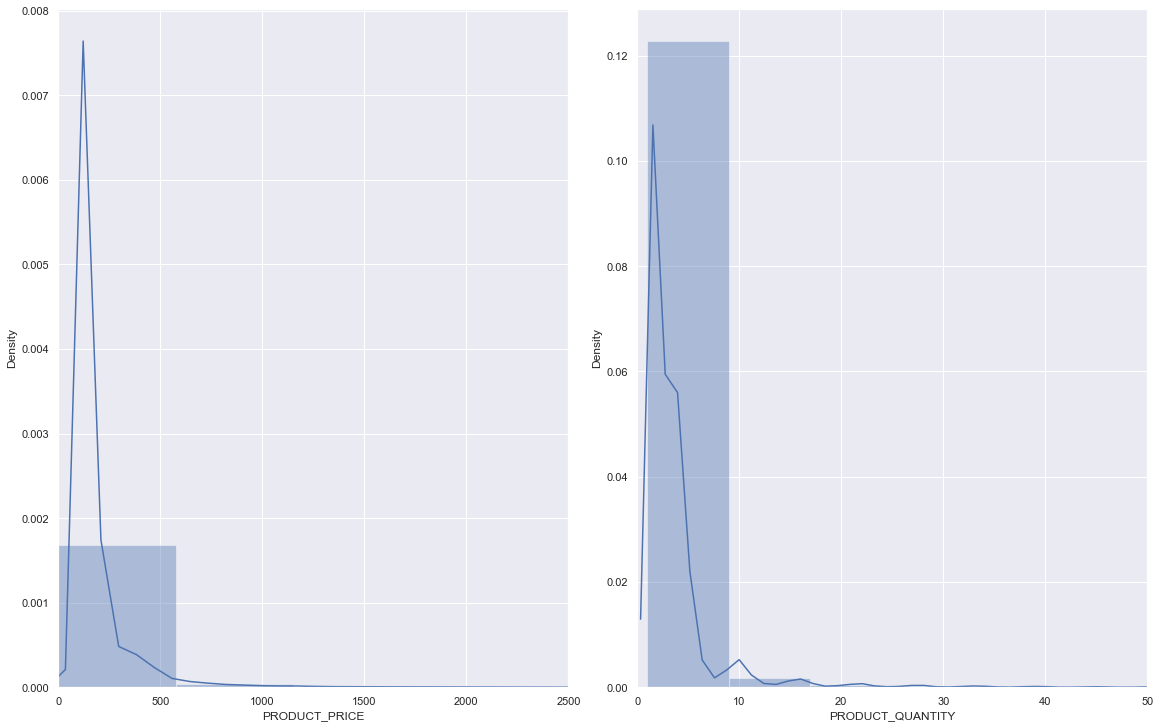

In [23]:
fig, ax = plt.subplots(1,len(num_var),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(num_var)):     
    sns.set(rc={"figure.figsize":(16, 10)})
    sns.distplot(df[num_var[i]], bins = 30, hist = True, ax = ax[i])
    #ax[i].set_yscale("log")
ax[0].set_xlim([0,2500])
ax[1].set_xlim([0,50])

## Bi-variate Analysis

#### Correlation

In [78]:
df0.corr()

,ID_REGION,PRODUCT_PRICE,PRODUCT_QUANTITY,WEEKDAY,IS_SCHOOL_BREAK,IS_HOLIDAY,IS_PAYMENTDAY
ID_REGION,1.000000,0.042003,0.061014,-0.003195,-0.037730,-0.031103,-0.033249
PRODUCT_PRICE,0.042003,1.000000,0.944132,0.019382,-0.054965,-0.034794,-0.071771
PRODUCT_QUANTITY,0.061014,0.944132,1.000000,0.022834,-0.055413,-0.031090,-0.061235
WEEKDAY,-0.003195,0.019382,0.022834,1.000000,-0.006987,0.722486,0.006681
IS_SCHOOL_BREAK,-0.037730,-0.054965,-0.055413,-0.006987,1.000000,-0.008091,0.001790
IS_HOLIDAY,-0.031103,-0.034794,-0.031090,0.722486,-0.008091,1.000000,0.032036
IS_PAYMENTDAY,-0.033249,-0.071771,-0.061235,0.006681,0.001790,0.032036,1.000000


In [79]:
df0.corr().sort_values('PRODUCT_QUANTITY',axis=0, ascending = False)['PRODUCT_QUANTITY']

PRODUCT_QUANTITY    1.000000
PRODUCT_PRICE       0.944132
ID_REGION           0.061014
WEEKDAY             0.022834
IS_HOLIDAY         -0.031090
IS_SCHOOL_BREAK    -0.055413
IS_PAYMENTDAY      -0.061235
Name: PRODUCT_QUANTITY, dtype: float64

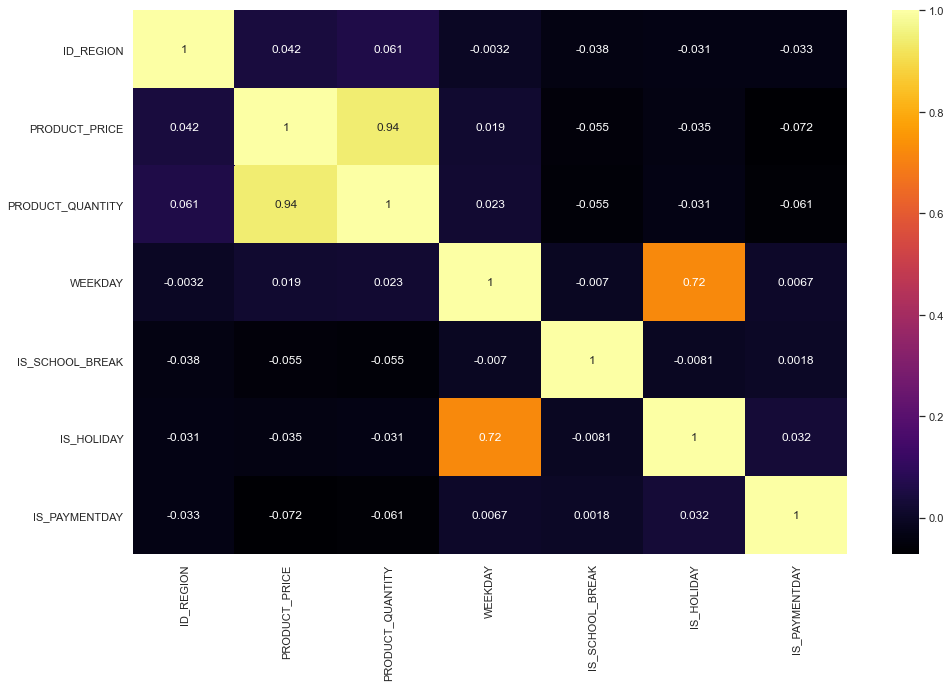

In [80]:
sns.heatmap(df0.corr(), cmap = 'inferno',annot = True)
plt.show()

#### Numerical Variables x Numerical Variables

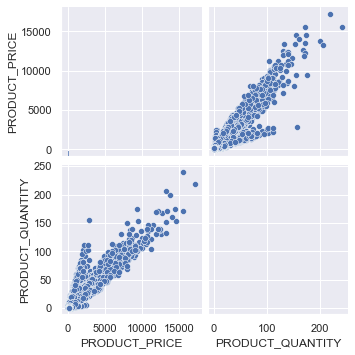

In [81]:
sns.pairplot(df.iloc[:,3:5], diag_kind = 'hist')
#plt.title('Correlation between PRODUCT_PRICE and PRODUCT_QUANTITY')
plt.show()

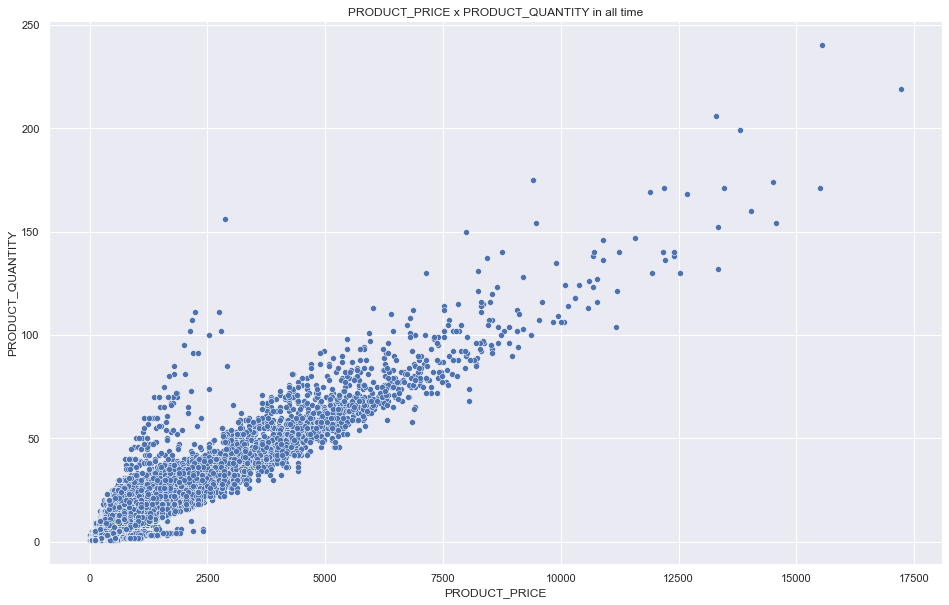

In [82]:
sns.scatterplot(x = 'PRODUCT_PRICE',y='PRODUCT_QUANTITY',data=df, ci = None)
plt.title('PRODUCT_PRICE x PRODUCT_QUANTITY in all time')
plt.show()

#### Categorical Variables x Numerical Variables

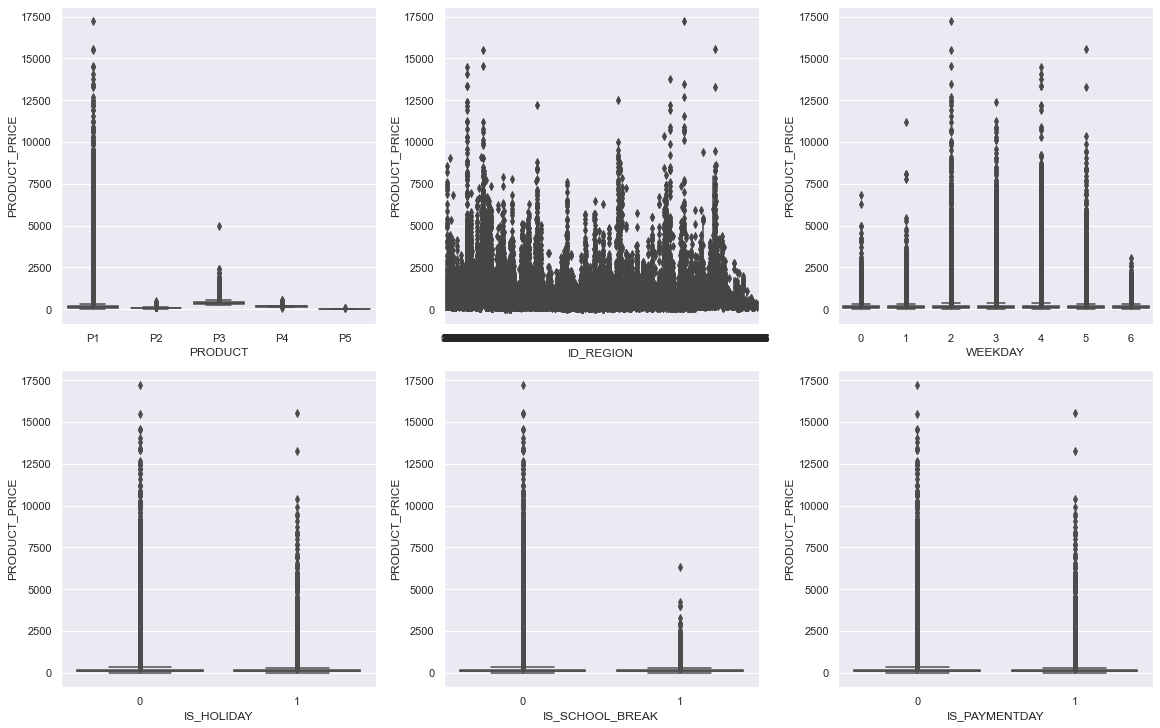

In [83]:
fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.boxplot(x = df[cat_var[i,j]], y = df[num_var[0]], data = df, ax = ax[i,j])

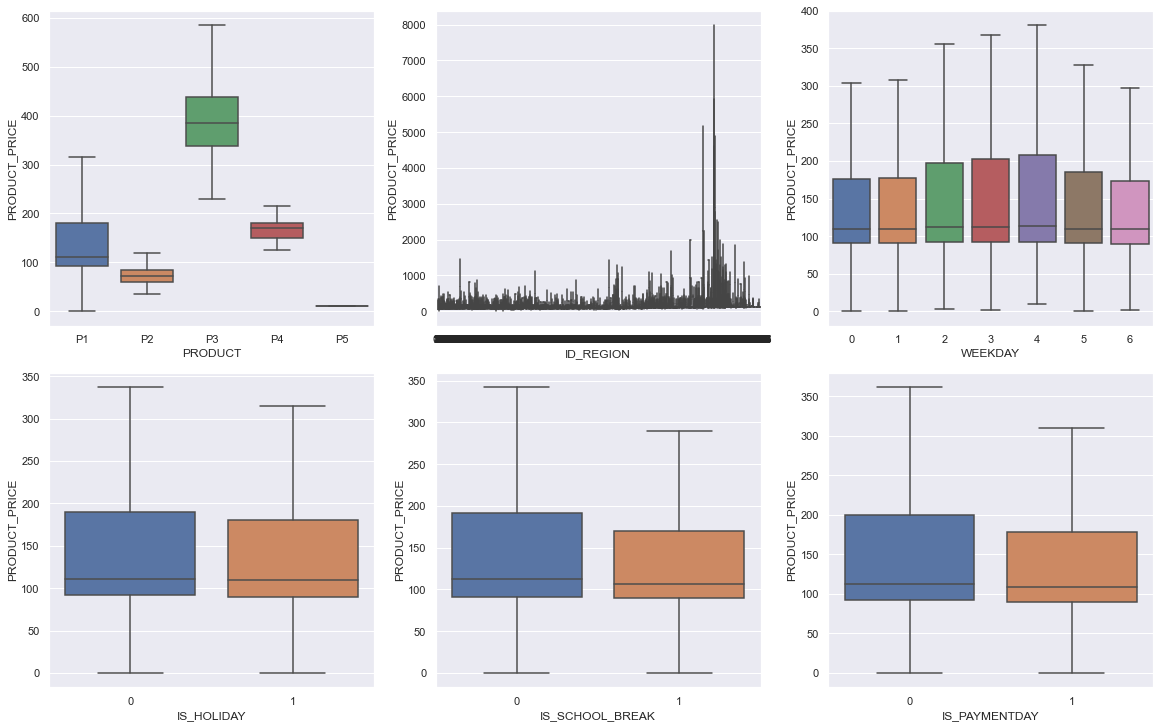

In [84]:
fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.boxplot(x = df[cat_var[i,j]], y = df[num_var[0]], data = df, showfliers = False, ax = ax[i,j])

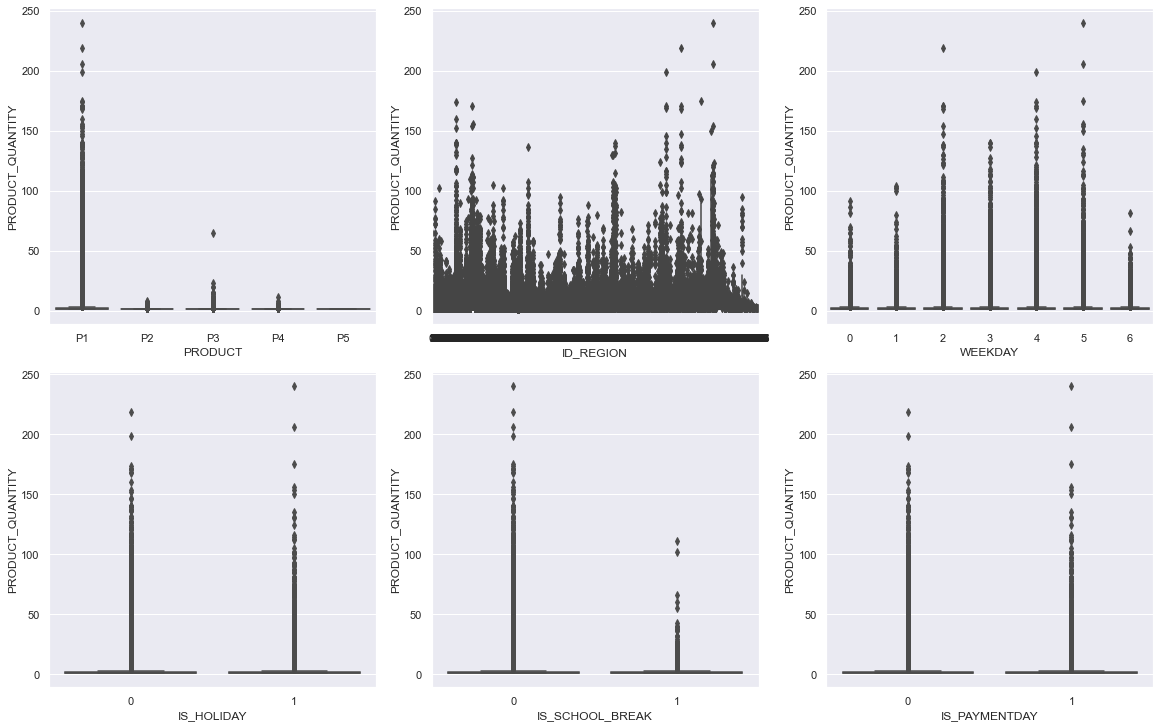

In [85]:
fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.boxplot(x = df[cat_var[i,j]], y = df[num_var[1]], data = df, ax = ax[i,j])

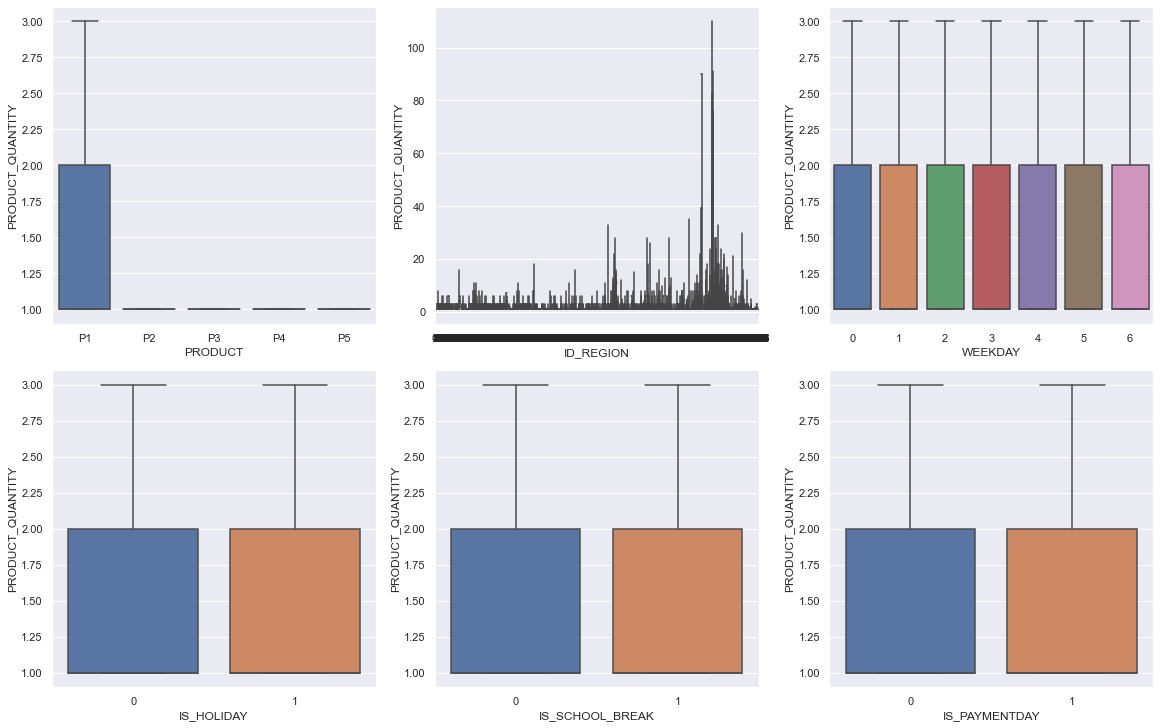

In [86]:
fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.boxplot(x = df[cat_var[i,j]], y = df[num_var[1]], data = df, showfliers = False, ax = ax[i,j])

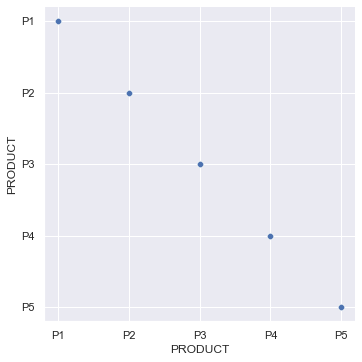

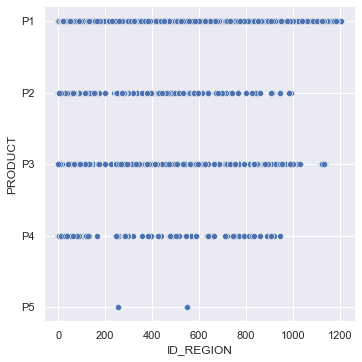

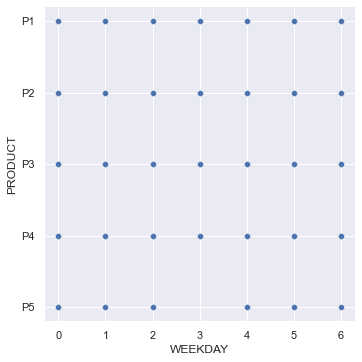

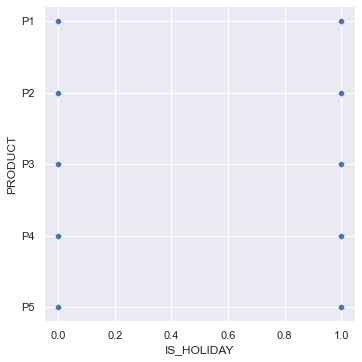

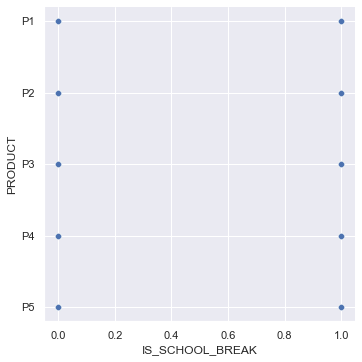

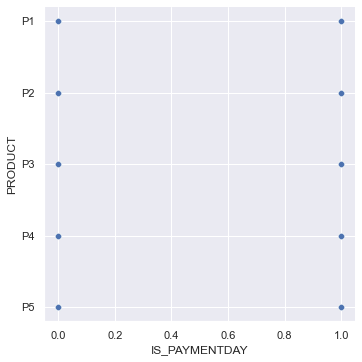

In [87]:
#fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.relplot(x = df[cat_var[i,j]], y = df[cat_var[0,0]], data = df)

#### Categorical Variables x Categorical Variables

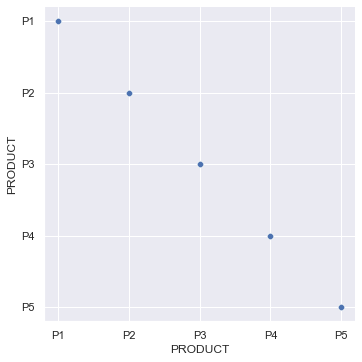

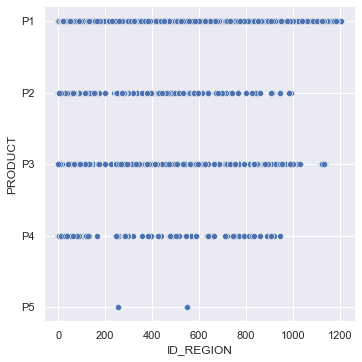

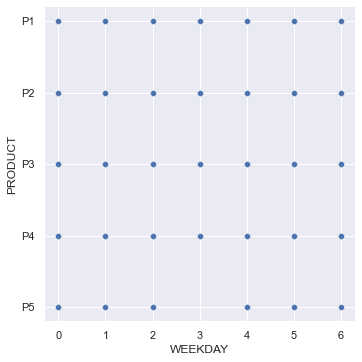

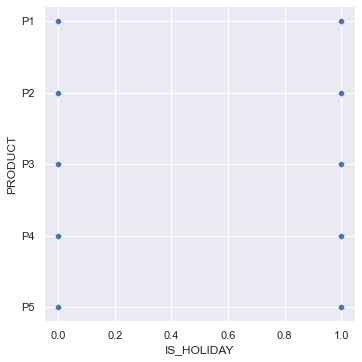

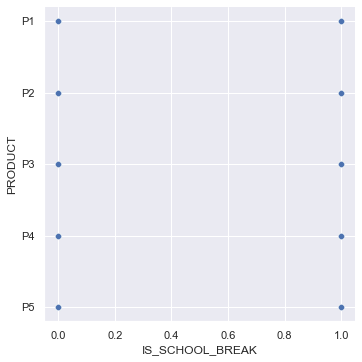

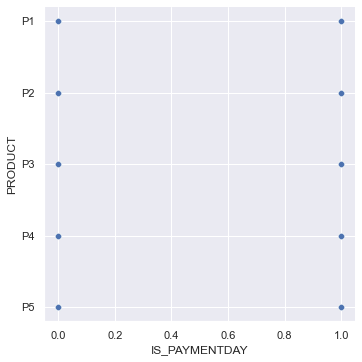

In [88]:
#fig, ax = plt.subplots(len(cat_var[:,1]),len(cat_var[1,:]),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.relplot(x = df[cat_var[i,j]], y = df[cat_var[0,0]], data = df)

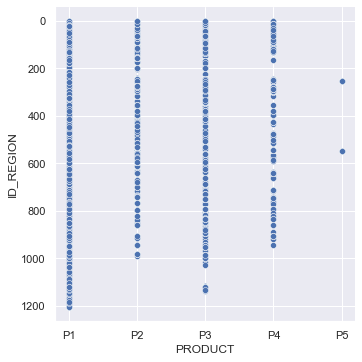

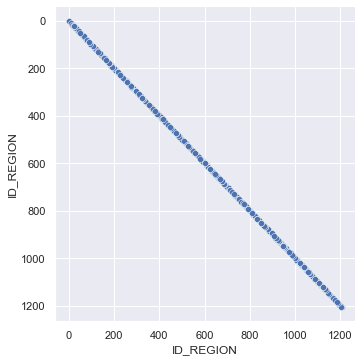

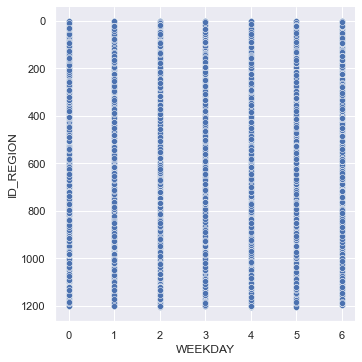

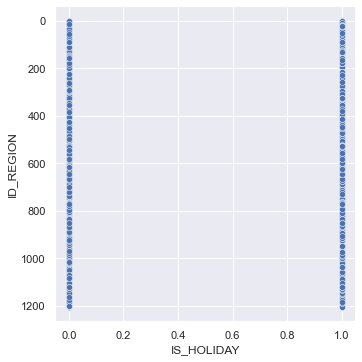

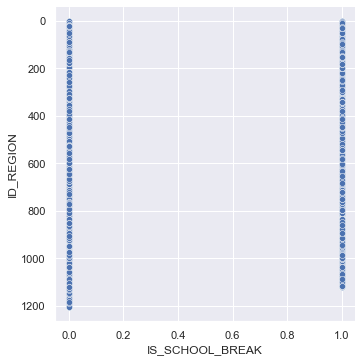

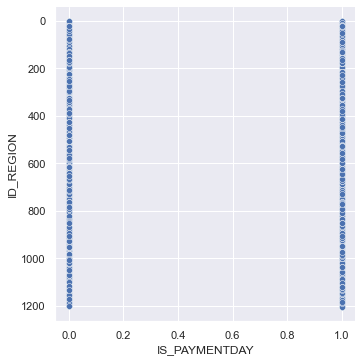

In [89]:
sns.set_style('darkgrid')
for i in range(len(cat_var[:,1])):
    for j in range(len(cat_var[1,:])):     
        sns.set(rc={"figure.figsize":(16, 10)})
        sns.relplot(x = df[cat_var[i,j]], y = df[cat_var[0,1]], data = df)

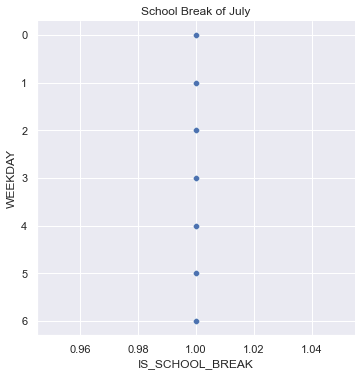

In [90]:
df202107 = df[(df.month == 7)&(df.year == 2021)]
sns.relplot(x = df202107['IS_SCHOOL_BREAK'], y = df202107['WEEKDAY'], data = df202107)
plt.title('School Break of July')
plt.show()

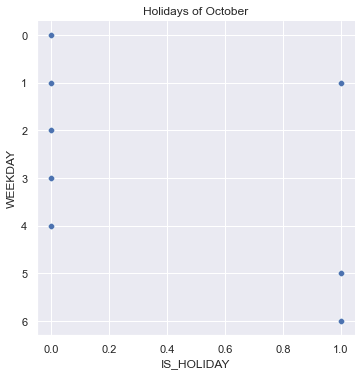

In [91]:
df202107 = df[(df.month == 10)&(df.year == 2021)]
sns.relplot(x = df202107['IS_HOLIDAY'], y = df202107['WEEKDAY'], data = df202107)
plt.title('Holidays of October')
plt.show()

#### Time Series

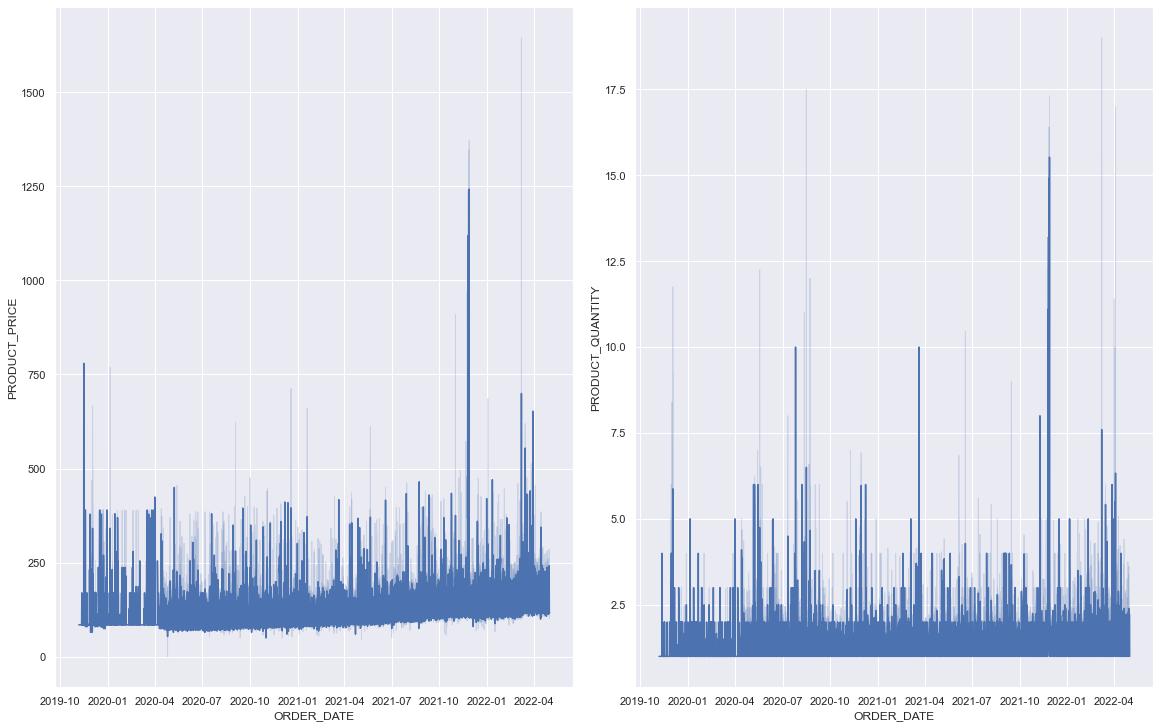

In [92]:
fig, ax = plt.subplots(1,len(num_var),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(num_var)):     
    sns.set(rc={"figure.figsize":(16, 10)})
    sns.lineplot(x = df['ORDER_DATE'],y = df[num_var[i]],  ax = ax[i])
plt.show()

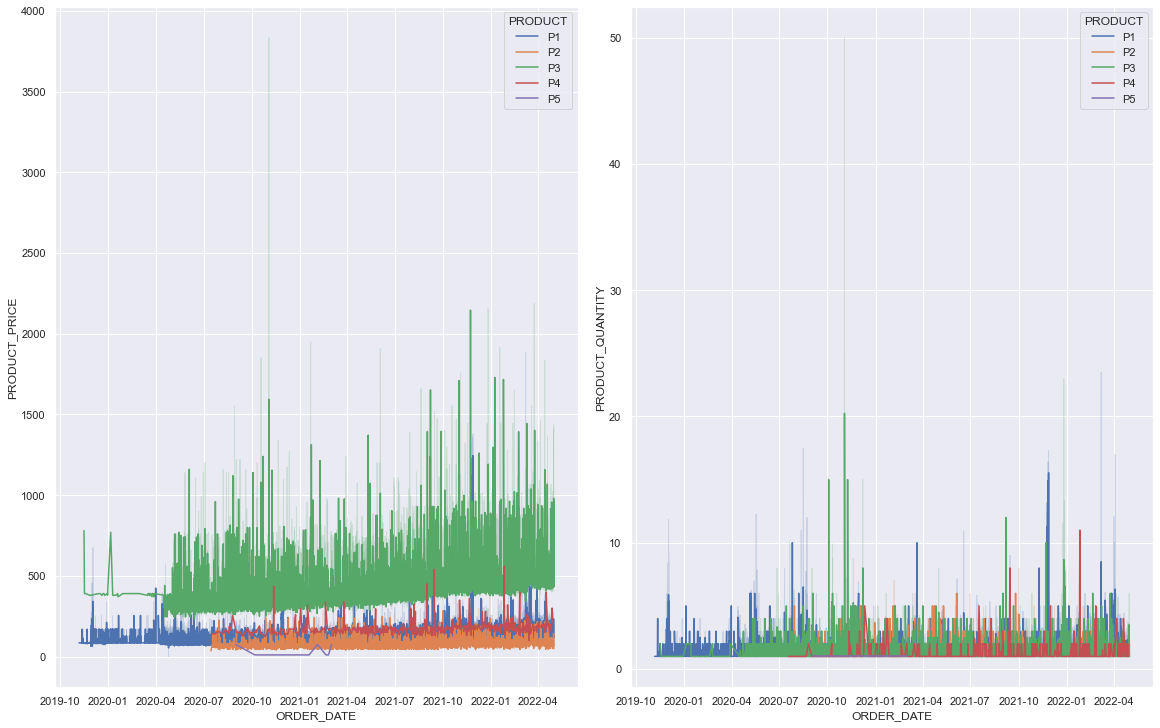

In [93]:
fig, ax = plt.subplots(1,len(num_var),constrained_layout=True)
sns.set_style('darkgrid')
for i in range(len(num_var)):     
    sns.set(rc={"figure.figsize":(16, 10)})
    sns.lineplot(x = df['ORDER_DATE'],y = df[num_var[i]], hue = df[cat_var[0,0]], ax = ax[i])
plt.show()